# Desafio Kaggle - Sale Price Houses

#### Bibliotecas Utilizadas

In [2208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.impute import SimpleImputer

#### Definição de dataframes

In [2209]:
#Define the dataframe of train
df_train = pd.read_csv('train.csv')

#Define the tests dataframe
df_test = pd.read_csv('test.csv')

dfs = [df_train,df_test]

#### Drop de colunas desnecessárias

In [2210]:

df_train = df_train.drop(columns=['Alley','PoolQC','FireplaceQu','Fence','MiscFeature','MasVnrType'])
'''
Colunas para dropar
Alley          
PoolQC         
FireplaceQu    
Fence          
MiscFeature  
MasVnrType       

'''
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

#### Lidando com dados categóricos substindo vazios por "Na"

In [2211]:
#Missing values on garage columns means that the house doesnt have a garage, so fill with 0
for i in df_train.select_dtypes(include='object').columns:
    if i.startswith(('Garage','Bsmt')):
        df_train[[i]] = df_train[[i]].fillna('Na')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

#### Substituindo dados vazios numéricos por 0

In [2212]:
#Leading with numeric data
dados_numericos = df_train.select_dtypes(exclude='object')
for i in dados_numericos.columns:
    if (i.startswith(('Lot', 'MasVnr')) or (i == 'GarageYrBlt')):
        df_train[i] = df_train[i].fillna(0)

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [2213]:
def scatterGraph(df, x, y):
    sns.scatterplot(df, x = x, y = y)
    plt.figure(figsize=(12,7))

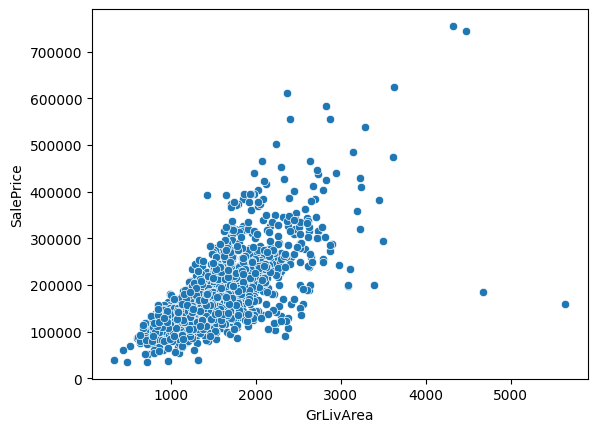

<Figure size 1200x700 with 0 Axes>

In [2214]:
scatterGraph(df_train, df_train['GrLivArea'],df_train['SalePrice'])

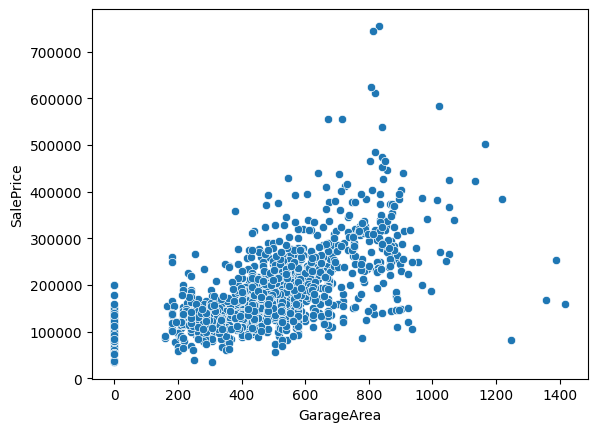

<Figure size 1200x700 with 0 Axes>

In [2215]:
scatterGraph(df_train, df_train['GarageArea'],df_train['SalePrice'])

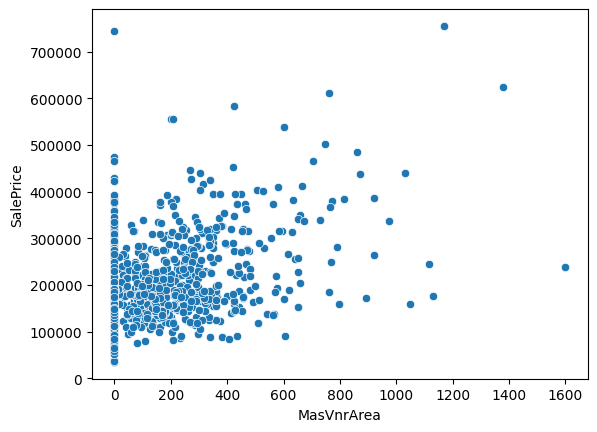

<Figure size 1200x700 with 0 Axes>

In [2216]:
scatterGraph(df_train, x = df_train['MasVnrArea'],y = df_train['SalePrice'])

#### Criação de novas colunas com maior correlação com a SalePrice

In [2217]:
df_train['BathroomsTot'] = df_train['FullBath'] + df_train['HalfBath']

#### Correlação entre as variáveis

In [2218]:
#Verify the correlation 

matriz_corr = df_train.select_dtypes(exclude='object').corr()

target_corr = matriz_corr['SalePrice'].drop('SalePrice')

resultados = target_corr.abs().sort_values(ascending= False)

print(resultados)

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
BathroomsTot     0.568267
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261366
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
LotFrontage      0.209624
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
Id               0.021917
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePr

#### Definição das variáveis dependentes e independentes

In [2219]:
x = np.asanyarray(df_train[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','BathroomsTot'
,'FullBath' ,'TotRmsAbvGrd' ,'YearBuilt','YearRemodAdd','MasVnrArea','Fireplaces','BsmtFinSF1' ,'WoodDeckSF' ,      
'2ndFlrSF','OpenPorchSF','HalfBath','LotArea','GarageYrBlt','HouseStyle','ExterCond','LotShape','LandContour',
'ExterQual']].values)
y = np.asanyarray(df_train[['SalePrice']].values)

In [2220]:
housestyle = preprocessing.LabelEncoder()
housestyle.fit(['1Story','2Story','1.5Fin','SLvl','SFoyer','1.5Unf','2.5Unf','2.5Fin'])
x[:,20] = housestyle.transform(x[:,20])

extercond = preprocessing.LabelEncoder()
extercond.fit(['TA','Gd','Fa','Ex','Po'])
x[:,21] = extercond.transform(x[:,21])

lotshape = preprocessing.LabelEncoder()
lotshape.fit(['Reg','IR1','IR2','IR3'])
x[:,22] = lotshape.transform(x[:,22])

landcontour = preprocessing.LabelEncoder()
landcontour.fit(['Lvl','Bnk','HLS','Low'])
x[:,23] = landcontour.transform(x[:,23])

exterqual = preprocessing.LabelEncoder()
exterqual.fit(['TA','Gd','Ex','Fa'])
x[:,24] = exterqual.transform(x[:,24])

#### Variáveis categóricas para numéricas

### Train Test Split

In [2221]:
#Divisão de teste e treino
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size=0.2, random_state=8)

## Utilizando a arvore de regressão para previsão

In [2222]:
regression_tree = DecisionTreeRegressor(criterion='squared_error')
regression_tree.fit(x_treino, y_treino)

DecisionTreeRegressor()

#### Coeficiente utilizado para previsão

In [2223]:
regression_tree.score(x_teste, y_teste)

0.597733924667055

#### Realização da predição e do erro médio absoluto e erro médio absoluto quadrático

In [2224]:
#Make a prediction
y_pred = regression_tree.predict(x_teste)

erro_medio = np.abs(np.mean(y_pred - y_teste))
print(f'Erro médio absoluto = {erro_medio}')
print(f'Erro médio absoluto quadrático = {np.abs(np.mean((y_pred - y_teste) **2))}')

Erro médio absoluto = 4900.681506849315
Erro médio absoluto quadrático = 12832496193.959326


Text(0, 0.5, 'Pred')

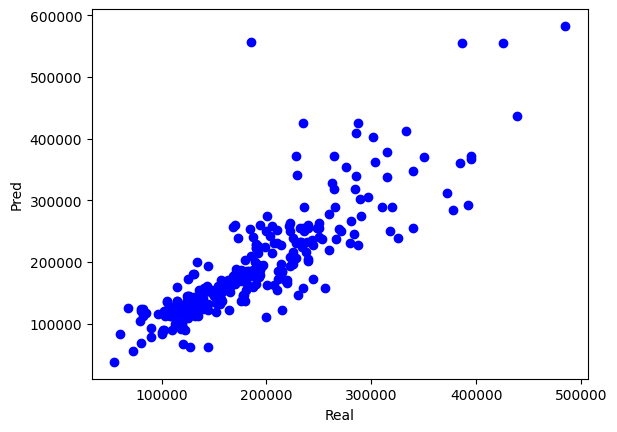

In [2225]:
plt.scatter(y_teste, y_pred, color = 'blue')
plt.xlabel('Real')
plt.ylabel('Pred')

### Utilizando Regressão Linear Multipla

In [2226]:
regr = linear_model.LinearRegression()
regr.fit(x_treino, y_treino)

LinearRegression()

In [2227]:
y_pred_regrl = regr.predict(x_teste)
print(f'Erro médio quadrático {np.abs(np.mean((y_pred_regrl - y_teste) ** 2))}')
print(f'Erro médio absoluto {np.abs(np.mean(y_pred_regrl - y_teste))}')

Erro médio quadrático 1210923774.2717063
Erro médio absoluto 3340.435872337734


Text(0, 0.5, 'Predição')

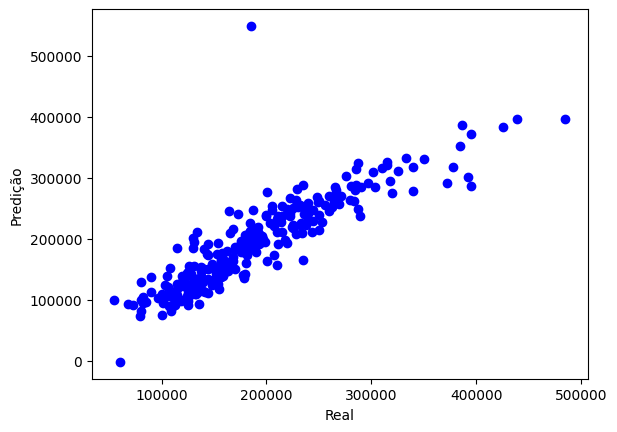

In [2228]:
plt.scatter(y_teste, y_pred_regrl, color = 'blue')
plt.xlabel('Real')
plt.ylabel('Predição')

## Comparação entre os dois modelos

##### Comparando os dois modelos o modelo de regressão foi o mais efetivo tendo um menor erro médio quadrático absoluto e um menor erro médio absoluto sendo nesse caso o melhor modelo a ser utilizado

#### Utilizando os algorítimo de regressão seguem os resultados

#### Exclusão de colunas excluidas na base de treino

In [2229]:
df_test = df_test.drop(columns=['Alley','PoolQC','FireplaceQu','Fence','MiscFeature','MasVnrType'])

#### Criação da coluna "BathroomsTot"

In [2230]:
df_test['BathroomsTot'] = df_test['FullBath'] + df_test['HalfBath']

#### Lidando com dados categóricos

In [2231]:
#Missing values on garage columns means that the house doesnt have a garage, so fill with 0
for i in df_test.select_dtypes(include='object').columns:
    if i.startswith(('Garage','Bsmt','Total')):
        df_test[[i]] = df_test[[i]].fillna('Na')


#### Lidando com dados numéricos

In [2232]:
#Leading with numeric data
dados_numericos = df_test.select_dtypes(exclude='object')
for i in dados_numericos.columns:
    if (i.startswith(('Lot', 'MasVnr','Garage','Mas','Bsmt','Total')) or (i == 'GarageYrBlt')):
        df_test[i] = df_test[i].fillna(0)

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

#### Definição da variável x de teste

In [2233]:
x_test = np.asanyarray(df_test[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','BathroomsTot'
,'FullBath' ,'TotRmsAbvGrd' ,'YearBuilt','YearRemodAdd','MasVnrArea','Fireplaces','BsmtFinSF1' ,'WoodDeckSF' ,      
'2ndFlrSF','OpenPorchSF','HalfBath','LotArea','GarageYrBlt','HouseStyle','ExterCond','LotShape','LandContour',
'ExterQual']].values)

#### Definição do x de teste

In [2234]:
x_test = np.asanyarray(df_test[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','BathroomsTot'
,'FullBath' ,'TotRmsAbvGrd' ,'YearBuilt','YearRemodAdd','MasVnrArea','Fireplaces','BsmtFinSF1' ,'WoodDeckSF' ,      
'2ndFlrSF','OpenPorchSF','HalfBath','LotArea','GarageYrBlt','HouseStyle','ExterCond','LotShape','LandContour',
'ExterQual']].values)

#### Substituição de dados categóricos em string para números inteiros

In [2235]:
housestyle = preprocessing.LabelEncoder()
housestyle.fit(['1Story','2Story','1.5Fin','SLvl','SFoyer','1.5Unf','2.5Unf','2.5Fin'])
x_test[:,20] = housestyle.transform(x_test[:,20])

extercond = preprocessing.LabelEncoder()
extercond.fit(['TA','Gd','Fa','Ex','Po'])
x_test[:,21] = extercond.transform(x_test[:,21])

lotshape = preprocessing.LabelEncoder()
lotshape.fit(['Reg','IR1','IR2','IR3'])
x_test[:,22] = lotshape.transform(x_test[:,22])

landcontour = preprocessing.LabelEncoder()
landcontour.fit(['Lvl','Bnk','HLS','Low'])
x_test[:,23] = landcontour.transform(x_test[:,23])

exterqual = preprocessing.LabelEncoder()
exterqual.fit(['TA','Gd','Ex','Fa'])
x_test[:,24] = exterqual.transform(x_test[:,24])

In [2236]:
resultado_y_pred = regr.predict(x_test)

### Resultados a partir da base de X teste exportado em csv

In [2237]:
df_test['SalePrice'] = resultado_y_pred

#### Exportando o resultado em csv

In [2238]:
resultado_csv = df_test[['Id','SalePrice']]
resultado_csv.to_csv('Resultado_house_prices.csv',index=False)